In [8]:
import os, json
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme()

In [9]:
# Load PO-UCT results
data_path = "./data/simulation_results/pouct_eval/"
file_names = [f for f in os.listdir(data_path) if f.endswith('.csv')]

data = []
for file_name in file_names:
    data.append(pd.read_csv(data_path+file_name))


pouct_data = pd.concat(data)
pouct_data["type"] = "PO-UCT: " + pouct_data["steps"].astype(str)
pouct_data.head()


,Unnamed: 0,reward,actions,seed,runtime,true_reward,expected_reward,steps,exploration_coeff,rollout_depth,type
0,0,3.732784,5,5000,1.707762,4.035003,3.732784,1000,10.0,0,PO-UCT: 1000
1,1,3.642689,5,5001,1.815193,4.204752,3.642689,1000,10.0,0,PO-UCT: 1000
2,2,3.707361,5,5002,1.933776,4.891583,3.707361,1000,10.0,0,PO-UCT: 1000
3,3,3.758194,5,5003,2.119002,5.131884,3.758194,1000,10.0,0,PO-UCT: 1000
4,4,3.922327,5,5004,2.121899,4.297647,3.922327,1000,10.0,0,PO-UCT: 1000


In [10]:
project_data = pd.read_csv("./data/simulation_results/eval_voc.csv")
project_data["type"] = "Ours"
project_data.head()

,Unnamed: 0,reward,actions,seed,runtime,true_reward,expected_reward,type
0,0,3.821586,3,5000,0.765625,4.039003,3.821586,Ours
1,1,3.819586,4,5001,0.890625,3.173295,3.819586,Ours
2,2,3.716219,5,5002,0.875000,4.638325,3.716219,Ours
3,3,3.821586,3,5003,0.718750,5.135884,3.821586,Ours
4,4,3.658340,5,5004,0.890625,4.297647,3.658340,Ours


In [11]:
merge_col = ["type", "expected_reward", "true_reward", "actions", "runtime"]
temp1 = project_data[merge_col]
temp2 = pouct_data[merge_col]

df = pd.concat([temp1, temp2])
df.dtypes


type                object
expected_reward    float64
true_reward        float64
actions              int64
runtime            float64
dtype: object

Text(0.5, 0, '')

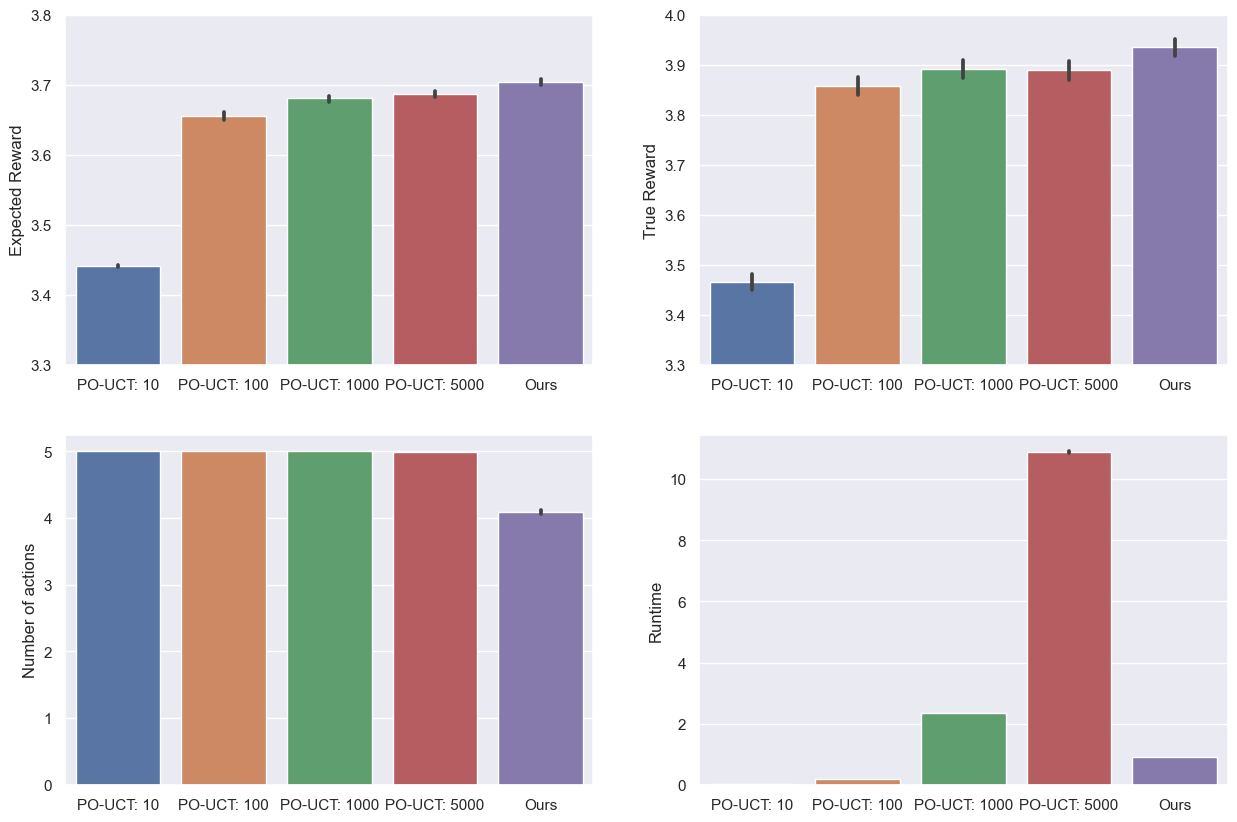

In [12]:
order = ["PO-UCT: 10", "PO-UCT: 100", "PO-UCT: 1000", "PO-UCT: 5000", "Ours"]

fig, axes =plt.subplots(2,2, figsize=(15,10))
axes = axes.flatten()

g = sns.barplot(df, y="expected_reward", x="type", ax=axes[0], order=order)
g.set_ylim((3.3, 3.8))
g.set_ylabel("Expected Reward")
g.set_xlabel("")
g = sns.barplot(df, y="true_reward", x="type", ax=axes[1], order=order)
g.set_ylim((3.3, 4))
g.set_ylabel("True Reward")
g.set_xlabel("")
g = sns.barplot(df, y="actions", x="type", ax=axes[2], order=order)
g.set_ylabel("Number of actions")
g.set_xlabel("")
g = sns.barplot(df, y="runtime", x="type", ax=axes[3], order=order)
g.set_ylabel("Runtime")
g.set_xlabel("")

In [16]:
df.groupby("type").agg(["mean", "std"])[["expected_reward", "runtime"]].round(4)

expected_reward          runtime        
                        mean     std     mean     std
type                                                 
Ours                  3.7037  0.1550   0.9079  0.1886
PO-UCT: 10            3.4411  0.0703   0.0175  0.0135
PO-UCT: 100           3.6553  0.2001   0.1972  0.0285
PO-UCT: 1000          3.6805  0.1697   2.3567  0.1013
PO-UCT: 5000          3.6873  0.1535  10.8913  0.6240

In [14]:
df.to_csv("./data/simulation_results/simulation_data.csv")